# Specifying Desired Nuclei to Construct a Network

The `Library` class in `pynucastro` provides a high level interface for reading files containing one or more Reaclib rates and then filtering these rates based on user-specified criteria for the nuclei involved in the reactions. We can then use the resulting rates to build a network.

This example uses a Reaclib snapshot downloaded from:

https://groups.nscl.msu.edu/jina/reaclib/db/library.php?action=viewsnapshots.

## Reading a rate snapshot

The `Library` class will look for the library file in the working directory or in the `pynucastro/library` subdirectory of the `pynucastro` package.

When the constructor is supplied a file name, `pynucastro` will read the contents of this file and interpret them as Reaclib rates in either the Reaclib 1 or 2 formats. The `Library` then stores the rates from the file as `Rate` objects.

In [1]:
%matplotlib inline
import pynucastro as pyna

In [2]:
library_file = '20180201ReaclibV2.22'

In [3]:
mylibrary = pyna.rates.Library(library_file)

## Specifying Desired Nuclei

This example constructs a CNO network like the one constructed from a set of Reaclib rate files in the "pynucastro usage examples" section of this documentation.

This time, however, we will specify the nuclei we want in the network and allow the `Library` class to find all the rates linking only nuclei in the set we specified.

We can specify these nuclei by their abbreviations in the form, e.g. "he4":

In [4]:
all_nuclei = ["p", "he4", "c12", "n13", "c13", "o14", "n14", "o15", "n15"]

Now we use the `Library.linking_nuclei()` function to return a smaller `Library` object containing only the rates that link these nuclei.

We can pass `with_reverse=False` to restrict `linking_nuclei` to only include forward rates from the Reaclib library, as pynucastro does not yet implement partition functions for reverse rates.

In [5]:
cno_library = mylibrary.linking_nuclei(all_nuclei, with_reverse=False)

Now we can create a network (`PythonNetwork` or `StarKillerNetwork`) as:

In [6]:
cno_network = pyna.networks.PythonNetwork(libraries=cno_library)

In the above, we construct a network from a `Library` object by passing the `Library` object to the `libraries` argument of the network constructor. To construct a network from multiple libraries, the `libraries` argument can also take a list of `Library` objects.

We can show the structure of the network by plotting a network diagram.

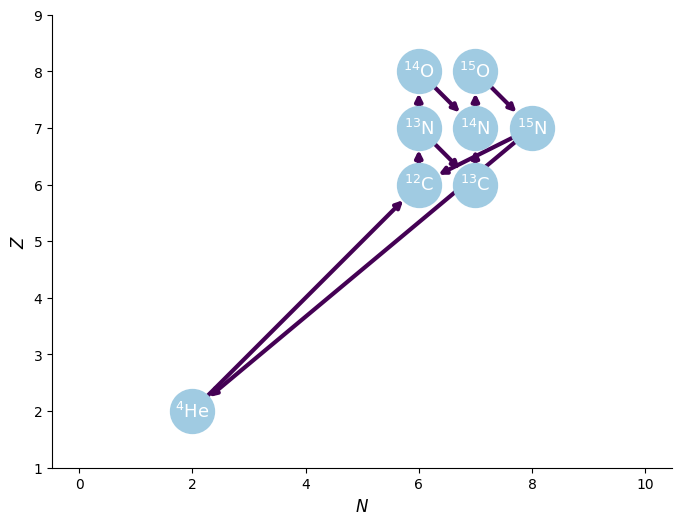

In [7]:
cno_network.plot()

Note that the above network also includes the triple-alpha rate from Reaclib.

If we wanted to generate the python code to calculate the right-hand side we could next do:

In [8]:
cno_network.write_network('network_module.py')

And we could run this together with the burn driver program in `examples/burn.py`